0.9932 accuracy per iteration
0.9987 accuracy per iteration
0.9997 accuracy per iteration
0.999 accuracy per iteration
0.9994 accuracy per iteration
0.9996 accuracy per iteration
0.9997 accuracy per iteration
0.9995 accuracy per iteration
1.0 accuracy per iteration
0.9995999599959996 accuracy per iteration
Accuracy: 0.5618
[SPLIT 1]
Accuracy: 0.9988
[SPLIT 2]
Accuracy: 0.9988
[SPLIT 3]
Accuracy: 0.9988
[SPLIT 4]
Accuracy: 0.9988
[SPLIT 5]
Accuracy: 0.9988
[SPLIT 6]
Accuracy: 0.9988
[SPLIT 7]
Accuracy: 0.9988
[SPLIT 8]
Accuracy: 0.9988
[SPLIT 9]
[[19964    12]
 [   22     2]]
0.9983


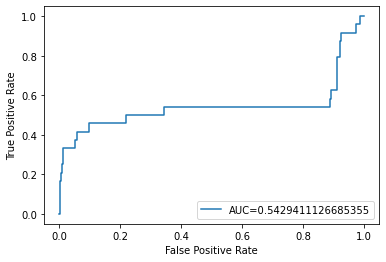

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
data = pd.read_csv("datafinal.csv")#extract data
#transform the categorical into numeric
#the data is bank interaction types as cash out chash in ..etc.
#X takes all the features except one feature only the "is Fraud " one.
#Y is the remaining feature "Is fraud" and is considered the output of the classification

data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,"CASH_IN": 3, "TRANSFER": 4,"DEBIT": 5})
#since we deal with integeres only, the "is fraud" feature is mapped to integer 
#0 represents "no fraud " and 1 represents "fraud"
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})#string to integers

from sklearn.model_selection import train_test_split
data.drop(['nameOrig','nameDest'],axis=1,inplace=True)
X=data.drop('isFraud',axis=1)#X takes the values of all the features except one feacture" is fraud"
y=data['isFraud']#Y is the remaining feature "Is fraud" and is considered the output of the classification
for i in range(1,7):#normalization of the data , data-minOf Data/ max of data= normalised data
    max_X=max(X.iloc[:,i])
    min_X=min(X.iloc[:,i])
    X.iloc[:,i]=(X.iloc[:,i]-min_X)/(max_X-min_X)
#splitting the data into 3 parts, 60% training , 20% cross validation,20% test, by using split function and entering the % we want
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)#splits data 60% train, 40% rest
X_cv, X_test_new=np.split(X_test, 2)#40% rest is divided by 50%= 20% cv,20%test
Y_cv , Y_test_new=np.split(y_test, 2)

y_train_new=np.zeros(len(y_train))
for i in range (len(y_train)):#mapping values of y_train from " is fraud" to integer values to be able to use later
    if y_train.iloc[i] == 'Fraud':
        y_train_new[i] =1  
y_train_new=pd.DataFrame(y_train_new)
Y_cv_new=np.zeros(len(Y_cv))
for i in range (len(Y_cv)):#mapping values of y_cv from " is fraud" to integer values to be able to use later
    if Y_cv.iloc[i] == 'Fraud':
        Y_cv_new[i] =1  
Y_test_new_1=np.zeros(len(Y_cv))
for i in range (len(Y_test_new)):#mapping values of y_test from " is fraud" to integer values to be able to use later
    if Y_test_new.iloc[i] == 'Fraud':
        Y_test_new_1[i] =1
from sklearn.linear_model import LogisticRegression
# the generateXvector adds 1 coulumn at the begining full of ones as Hypothesis=theta0*1+X*restThetas
def generateXvector(X):#add coloumn of 1 in X features
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables.  """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX
#the theta_init generates array of random thetas of length features+1(+1 due to theta0), used to generate the first hypothesis
#..then update it later using the logistic regression
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(X+1, 1)
    return theta
# the sigmoid_function used to take the hypothesis value and generate value between 0 and 1 , as the y " is fraud" has two values
#.. only the 0 and 1 , this function takes the hypothesis as an input hyp=np.dot(theta,X)
def sigmoid_function(X):
    """ Calculate the sigmoid value of the inputs
         Parameters:
          X:  values
        Return value: the sigmoid value
    """
    return 1/(1+math.e**(-X))
# the Logistics_Regression used to generate the best thetas for all orders of hyp. that gives the least cost 
def Logistics_Regression(X,y,learningrate, iterations):
        
    y_new = y
    cost_lst = []
    vectorX = generateXvector(X)#add 1 coloumn full of 1's
    theta = theta_init(len(X.iloc[0,:]))#generate random thetas of size=features+1
    m = len(X)
    for i in range(iterations):#loop 100 times for more accuracy, each time we calc. hypothesis with thetas and calc. cost, then take the thetas with least cost
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)#calc. gradient used in updating thetas values
        theta = theta - learningrate * gradients#update the thetas values
        y_pred = sigmoid_function(vectorX.dot(theta))#calculate the hypothesis with updated thetas
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))#calc cost between y_pred and y we already know
 #Calculate the loss for each training instance
        cost_lst.append(cost_value)#append the cost in array for plotting later
        
    # plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    # plt.title('Cost function Graph')
    # plt.xlabel('Number of iterations')
    # plt.ylabel('Cost')
    return theta, cost_value#return best theta with lower cost

theta1, cost_value1=Logistics_Regression(X_train,y_train_new,0.03, 100)
#the root_regularization takes the y_pred and y we know and calculates the cost but with different rule has a the term lamda
#so this function loops on different values of lamda and returns the lamda that gives least cost
def root_regularization(y_pred,y_test,theta): 
    cost_reg=100
    best_lamda=0
    lamda=np.array([0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24])#random generated lamda values
    cost_lst = []
    m = len(X)#size of X
    N = len(y_test)#number of users
    for l in range(np.size(lamda)):#this loops calc. cost with diff lamdas and takes the min cost and best lamda
        term=(lamda[l]/2*N)*(np.sum(theta**2))
        cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))+term
        cost_lst.append(cost_value)
        if cost_value<cost_reg:#compares the min value with the new cost , if new cost is smaller it becomes the min value
            cost_reg=cost_value
            best_lamda=lamda[l]
    return best_lamda,cost_reg

def rmse(y_pred,y_test):#calculated cost without lamda term, another way of calc. cost
    cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))
    return cost_value

cost_cv=100
theta1_cv=[]
for j in range(9):#cross validation(get the best order of hypothesis with least costs)
    vectorX=generateXvector(X_cv.iloc[:,0:j])#add 1 coloumn with 1's
    #call logistic reg. with X train to train the model and get each suitable theta for each hypothesis order
    theta2, cost_value1=Logistics_Regression(X_train.iloc[:,0:j],y_train_new,0.03, 100)
   #calculate the hypothesis with the resulted best thetas from logistic regression 
    y_pred = sigmoid_function(vectorX.dot(theta2))#calculate hypothesis using best thetas
    best_lamda,cost_reg=root_regularization(y_pred,Y_cv_new,theta2)#calculate cost with lamda
    if cost_value1<cost_cv:# take the order of hypothesis with least cost
        cost_cv=cost_value1
        theta1_cv=theta2# thetas length indicated the order of the hypothesis=features+1
    if cost_reg<cost_cv:
        cost_cv=cost_reg
        theta1_cv=theta2
#test the model using the Y_test 20% and calc. the (cost) of model
y_pred_test=sigmoid_function(np.dot(X_test_new.iloc[:,0:np.size(theta1_cv)], theta1_cv))
cost_Y_test=rmse(y_pred_test,Y_test_new_1)
cost_test_reg=rmse(y_pred_test,Y_test_new_1)+(best_lamda/2*len(Y_cv))*(np.sum(theta1_cv**2))
##K fold, a method used to train the model on differenr datas to have more accurate model
from sklearn.linear_model import LogisticRegression
skfolds = KFold(n_splits=10) #divides the data into 10 partitions,X takes 9 and y takes the left partition
splits = skfolds.split(X, y)
for i, (train_index, test_index) in enumerate(splits): #split and shuffle the data and calc. accuracy each time  
  x_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test  = X.iloc[test_index]
  y_test  = y.iloc[test_index]
  clf = LogisticRegression()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = np.mean(y_pred == y_test)
  print(accuracy,'accuracy per iteration')
##stratifiedKfold, a method used to train the model on differenr datas to have more accurate model
#but it makes sure that all partitions must contain all classes types" fraud","no fraud"
from sklearn.model_selection import StratifiedKFold

skfolds_1 = StratifiedKFold(n_splits=9)#K=9 as it makes sure that all partitions must contain all classes types" fraud","no fraud" and we only have 9 features.
splits_1 = skfolds_1.split(X, y)
for i, (train_index, test_index) in enumerate(splits_1): #split and shuffle the data 
  x_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test  = X.iloc[test_index]
  y_test  = y.iloc[test_index]
  clf_1 = LogisticRegression()
  clf_1.fit(x_train, y_train)
  y_pred_1 = clf_1.predict(x_test)
  accuracy = np.mean(y_pred_1 == y_test)
  print("Accuracy: %.4f"%accuracy)
  print("[SPLIT %d]"%(i+1))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics
print(sklearn.metrics.confusion_matrix(Y_test_new_1,np.round((y_pred_test))))
print(accuracy_score(Y_test_new_1, np.round((y_pred_test))) )#calculate the accyracy of our logistic reg. model
##
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
fpr, tpr, _ = metrics.roc_curve(Y_test_new_1,  y_pred_test)#represents the relation between TruePositives and FalsePositives
auc = metrics.roc_auc_score(Y_test_new_1, y_pred_test)

#create ROC curve
plt.figure()
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
